# Opdracht 2. 
-----------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import pprint

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('pokemon_dataset.csv')

## Data exploration
-------------------

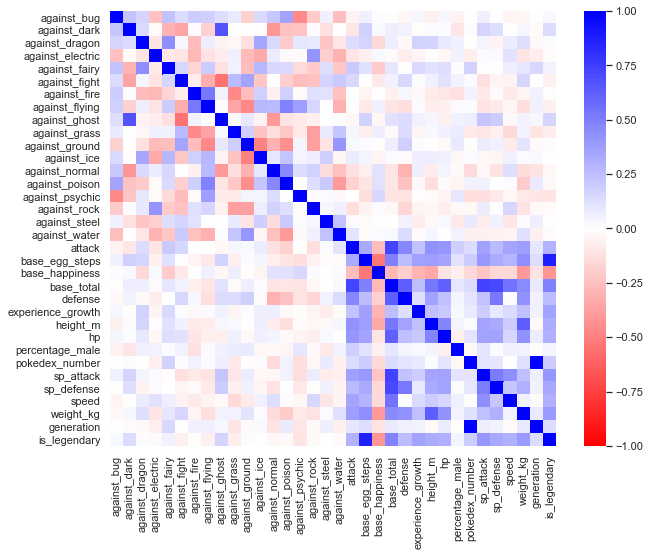

In [3]:
sns.set(rc={'figure.figsize':(10,8)})

sns.heatmap(df.corr(), annot=False, cmap='bwr_r', vmin='-1')

## Data preparation
--------------------

In [4]:
def rename_columns(dataf):
    return (dataf
            .rename(columns={'defense':'defence', 'sp_defense':'sp_defence', 'classfication':'classification'})
           )

    
def filter_columns(dataf):
    keep_columns = ['name',
                    'abilities',
                    'type1', 
                    'type2', 
                    'attack',
                    'base_egg_steps', 
                    'base_happiness', 
                    'base_total', 
                    'capture_rate',
                    'defence', 
                    'experience_growth', 
                    'height_m', 
                    'hp',
                    'sp_attack', 
                    'sp_defence', 
                    'speed', 
                    'weight_kg',
                    'is_legendary']
    return dataf[keep_columns]

def filter_rows(dataf, generation=False):
    if generation == False:
        return dataf
    else:
        return (dataf
                .loc[dataf['generation'].isin(generation)]
               )
    
def preprocess_columns(dataf):
    return (dataf
            .assign(capture_rate=dataf['capture_rate'].str.replace(pat='.*Meteorite.*', repl='30', regex=True))
            .assign(height_m=dataf['height_m'].fillna(0))
            .assign(weight_kg=dataf['weight_kg'].fillna(0))                      
           )

def change_dtypes(dataf):
    return (dataf
            .astype({'capture_rate': 'int64'})
           )

def convert_legendary_column(dataf):
    return (dataf
            .assign(is_legendary_cat = [True if x ==1 else False for x in dataf['is_legendary']])
           )

In [5]:
clean_df = (df
            .pipe(rename_columns)
            .pipe(filter_columns)
            .pipe(filter_rows)
            .pipe(preprocess_columns)
            .pipe(change_dtypes)
            .pipe(convert_legendary_column)
           )
clean_df.head()

,name,abilities,type1,type2,attack,base_egg_steps,base_happiness,base_total,capture_rate,defence,experience_growth,height_m,hp,sp_attack,sp_defence,speed,weight_kg,is_legendary,is_legendary_cat
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",grass,poison,49,5120,70,318,45,49,1059860,0.7,45,65,65,45,6.9,0,False
1,Ivysaur,"['Overgrow', 'Chlorophyll']",grass,poison,62,5120,70,405,45,63,1059860,1.0,60,80,80,60,13.0,0,False
2,Venusaur,"['Overgrow', 'Chlorophyll']",grass,poison,100,5120,70,625,45,123,1059860,2.0,80,122,120,80,100.0,0,False
3,Charmander,"['Blaze', 'Solar Power']",fire,NaN,52,5120,70,309,45,43,1059860,0.6,39,60,50,65,8.5,0,False
4,Charmeleon,"['Blaze', 'Solar Power']",fire,NaN,64,5120,70,405,45,58,1059860,1.1,58,80,65,80,19.0,0,False


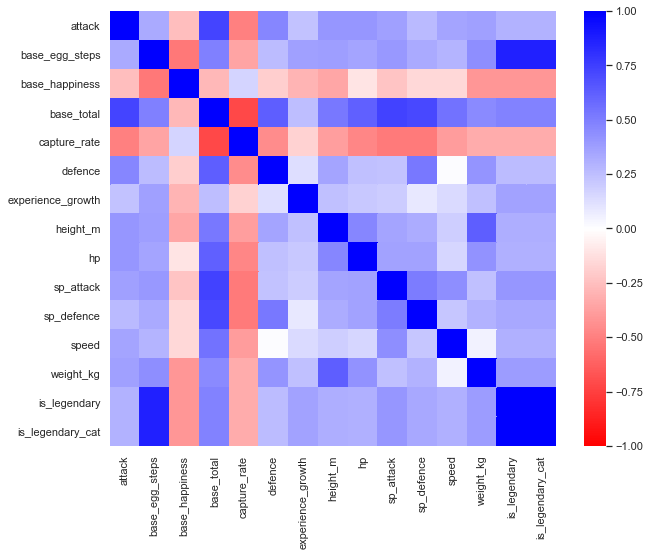

In [6]:
sns.heatmap(clean_df.corr(), annot=False, cmap='bwr_r', vmin='-1')

# K Nearest Neighbors Regressor
---------------------------
Only usable for numeric data, but let's see what happens.

In [7]:
#import libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [8]:
#Select data columns with numeric data

def filter_lr_columns(dataf):
    keep_columns = ['attack',
                    'base_egg_steps', 
                    'base_happiness', 
                    'base_total', 
                    'capture_rate', 
                    'defence', 
                    'experience_growth', 
                    'height_m', 
                    'hp',
                    'sp_attack', 
                    'sp_defence', 
                    'speed', 
                    'weight_kg',
                    'is_legendary']
    return dataf[keep_columns]

df_lr = (clean_df
         .pipe(filter_lr_columns)
        )

df_lr.head()

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defence,experience_growth,height_m,hp,sp_attack,sp_defence,speed,weight_kg,is_legendary
0,49,5120,70,318,45,49,1059860,0.7,45,65,65,45,6.9,0
1,62,5120,70,405,45,63,1059860,1.0,60,80,80,60,13.0,0
2,100,5120,70,625,45,123,1059860,2.0,80,122,120,80,100.0,0
3,52,5120,70,309,45,43,1059860,0.6,39,60,50,65,8.5,0
4,64,5120,70,405,45,58,1059860,1.1,58,80,65,80,19.0,0


In [9]:
# Split dataset into X (metrics to make prediction) and y (metric to predict)
def split_dataset(dataf):
    X = dataf.drop(['is_legendary'], axis=1)
    y = dataf['is_legendary']
    return [X, y]

X, y = split_dataset(df_lr)

X.info()
y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   attack             801 non-null    int64  
 1   base_egg_steps     801 non-null    int64  
 2   base_happiness     801 non-null    int64  
 3   base_total         801 non-null    int64  
 4   capture_rate       801 non-null    int64  
 5   defence            801 non-null    int64  
 6   experience_growth  801 non-null    int64  
 7   height_m           801 non-null    float64
 8   hp                 801 non-null    int64  
 9   sp_attack          801 non-null    int64  
 10  sp_defence         801 non-null    int64  
 11  speed              801 non-null    int64  
 12  weight_kg          801 non-null    float64
dtypes: float64(2), int64(11)
memory usage: 81.5 KB


0      0
1      0
2      0
3      0
4      0
      ..
796    1
797    1
798    1
799    1
800    1
Name: is_legendary, Length: 801, dtype: int64

In [10]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=5))
])

In [11]:
pipe.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsRegressor())])

In [12]:
pred = pipe.predict(X)

In [13]:
def cross_table(pred, y):
    list_of_tuples = list(zip(pred, y))
    dataf = pd.DataFrame(list_of_tuples, columns = ['pred', 'y'])
    dataf = (dataf
             .assign(correct_prediction = dataf['pred'] == dataf['y'])
            )
    return pd.crosstab(dataf['y'], dataf['correct_prediction'])
           


cross_table(pred, y)

correct_prediction,False,True
y,,
0,17,714
1,20,50


In [14]:
def pred_accuracy(pred, y):
    list_of_tuples = list(zip(pred, y))
    dataf = pd.DataFrame(list_of_tuples, columns = ['pred', 'y'])
    return (dataf
            .assign(correct_prediction = dataf['pred'] == dataf['y'])
            .groupby('y')
            .agg({'correct_prediction': ['count','sum', 'mean']})
           )


pred_accuracy(pred, y)

correct_prediction                 
               count    sum      mean
y                                    
0                731  714.0  0.976744
1                 70   50.0  0.714286

# Gaussian Naive Bayes
--------------------------
For classification with data including object type columns.


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [16]:
#Select data columns with numeric data

def filter_lr_columns(dataf):
    keep_columns = ['attack',
                    'base_egg_steps', 
                    'base_happiness', 
                    'base_total', 
                    'capture_rate', 
                    'defence', 
                    'experience_growth', 
                    'height_m', 
                    'hp',
                    'sp_attack', 
                    'sp_defence', 
                    'speed', 
                    'weight_kg',
                    'is_legendary_cat']
    return dataf[keep_columns]

df_gnb = (clean_df
         .pipe(filter_lr_columns)
        )

df_gnb.head()


,attack,base_egg_steps,base_happiness,base_total,capture_rate,defence,experience_growth,height_m,hp,sp_attack,sp_defence,speed,weight_kg,is_legendary_cat
0,49,5120,70,318,45,49,1059860,0.7,45,65,65,45,6.9,False
1,62,5120,70,405,45,63,1059860,1.0,60,80,80,60,13.0,False
2,100,5120,70,625,45,123,1059860,2.0,80,122,120,80,100.0,False
3,52,5120,70,309,45,43,1059860,0.6,39,60,50,65,8.5,False
4,64,5120,70,405,45,58,1059860,1.1,58,80,65,80,19.0,False


In [17]:
# Split dataset into X (metrics to make prediction) and y (metric to predict)
def split_dataset(dataf, category_column):
    X = dataf.drop([category_column], axis=1)
    y = dataf[category_column]
    return [X, y]


X, y = split_dataset(df_gnb, 'is_legendary_cat')

print(len(X))
print(sum(y == True))

801
70


In [18]:
#Split data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print(len(X_train))
print(len(X_test))

400
401


In [19]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 401 points : 20


In [20]:
def cross_table(pred, y):
    list_of_tuples = list(zip(pred, y))
    dataf = (pd.DataFrame(list_of_tuples, columns = ['pred', 'y'])
             .astype({'pred': 'int64'})
            )
    dataf = (dataf
             .assign(correct_prediction = dataf['pred'] == dataf['y'])
            )
    return pd.crosstab(dataf['y'], dataf['correct_prediction'])
           


cross_table(y_pred, y_test)

correct_prediction,False,True
y,,
False,17,347
True,3,34


In [21]:
def pred_accuracy(pred, y):
    list_of_tuples = list(zip(pred, y))
    dataf = pd.DataFrame(list_of_tuples, columns = ['pred', 'y'])
    return (dataf
            .assign(correct_prediction = dataf['pred'] == dataf['y'])
            .groupby('y')
            .agg(pred_accuracy=('correct_prediction', np.mean))
           )

pred_accuracy(y_pred, y_test)

,pred_accuracy
y,
False,0.953297
True,0.918919


# Predict pokemon type - Gaussian NB

In [22]:
#Select data columns with numeric data and categorical column to predict

def filter_lr_columns(dataf):
    keep_columns = ['attack',
                    'base_egg_steps', 
                    'base_happiness', 
                    'base_total', 
                    'capture_rate', 
                    'defence', 
                    'experience_growth', 
                    'height_m', 
                    'hp',
                    'sp_attack', 
                    'sp_defence', 
                    'speed', 
                    'weight_kg',
                    'type1']
    return dataf[keep_columns]

df_gnb = (clean_df
         .pipe(filter_lr_columns)
        )

df_gnb.head()

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defence,experience_growth,height_m,hp,sp_attack,sp_defence,speed,weight_kg,type1
0,49,5120,70,318,45,49,1059860,0.7,45,65,65,45,6.9,grass
1,62,5120,70,405,45,63,1059860,1.0,60,80,80,60,13.0,grass
2,100,5120,70,625,45,123,1059860,2.0,80,122,120,80,100.0,grass
3,52,5120,70,309,45,43,1059860,0.6,39,60,50,65,8.5,fire
4,64,5120,70,405,45,58,1059860,1.1,58,80,65,80,19.0,fire


In [23]:
X, y = split_dataset(df_gnb, category_column='type1')

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   attack             801 non-null    int64  
 1   base_egg_steps     801 non-null    int64  
 2   base_happiness     801 non-null    int64  
 3   base_total         801 non-null    int64  
 4   capture_rate       801 non-null    int64  
 5   defence            801 non-null    int64  
 6   experience_growth  801 non-null    int64  
 7   height_m           801 non-null    float64
 8   hp                 801 non-null    int64  
 9   sp_attack          801 non-null    int64  
 10  sp_defence         801 non-null    int64  
 11  speed              801 non-null    int64  
 12  weight_kg          801 non-null    float64
dtypes: float64(2), int64(11)
memory usage: 81.5 KB


In [24]:
#Split data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
#Train and test the model
gnb = GaussianNB()
y_pred = (gnb
          .fit(X_train, y_train)
          .predict(X_test)
         )

In [25]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 401 points : 348


In [26]:
def pred_accuracy(pred, y):
    list_of_tuples = list(zip(pred, y))
    dataf = pd.DataFrame(list_of_tuples, columns = ['pred', 'y'])
    return (dataf
            .assign(correct_prediction = dataf['pred'] == dataf['y'])
            .groupby('y')
            .agg(pred_accuracy=('correct_prediction', np.mean))
            .sort_values(by=['pred_accuracy'], axis=0, ascending=False)
           )

pred_accuracy(list(y_pred), list(y_test))

,pred_accuracy
y,
dragon,0.727273
bug,0.421053
fighting,0.384615
fire,0.290323
poison,0.133333
steel,0.100000
normal,0.096154
psychic,0.076923
rock,0.052632
